In [1]:
# !pip install -U spacy
# !python -m spacy download en
# !pip install networkx
# !pip install fuzzywuzzy

In [2]:
import pandas as pd
import numpy as np
import pickle
from operator import itemgetter
from fuzzywuzzy import process, fuzz
# for natural language processing
import spacy
import en_core_web_sm
# for visualizations
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

c:\Users\CL9\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import requests
import json
import time
import newspaper
import pickle
from newspaper import Article

#Mine
# article = Article('https://en.wikipedia.org/wiki/Papuan_mountain_pigeon')
# article.download()
# article.parse()
# text = article.text

# The article implementation
# corpus = []
# count = 0
# for article in npr.articles:
#     time.sleep(1)
#     article.download()
#     article.parse()
#     text = article.text
#     corpus.append(text)
#     if count % 10 == 0 and count != 0:
#         print('Obtained {} articles'.format(count))
#     count += 1

# corpus300 = corpus[:300]

# with open("npr_coronavirus.txt", "wb") as fp:   # Pickling
#     pickle.dump(corpus300, fp)

with open("Data/npr_coronavirus.txt", "rb") as fp:   # Unpickling
    corpus = pickle.load(fp)

## Loading Spacy english model

In [4]:
nlp = en_core_web_sm.load()

## Extract Entitites Geopolitical Entities (GPE) in articles

In [5]:
entities = []
for article in corpus[:50]:
    tokens = nlp(''.join(article))
    gpe_list = []
    for ent in tokens.ents:
        if ent.label_ == 'GPE':
            gpe_list.append(ent.text)
    entities.append(gpe_list)

In [6]:
entities

[['U.S.'],
 ['North Carolina Reports',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'U.S.',
  'Los Angeles',
  'Chicago',
  'Washington',
  'D.C.',
  'North Carolina'],
 ['NC'],
 ['North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina’s',
  'North Carolina',
  'North Carolina’s',
  'North Carolina',
  'North Carolina',
  'North Carolina'],
 ['Los Angeles',
  'D.C.',
  'Chicago',
  'U.S.',
  'Washington',
  'D.C.',
  'Chicago',
  'Los Angeles',
  'U.S.',
  'Washington',
  'D.C.',
  'Chicago',
  'Los Angeles',
  'D.C.',
  'LA',
  'Chicago',
  'Chicago',
  'Illinois',
  'Illinois',
  'Chicago',
  'Chicago',
  'Chicago',
  'Chicago',
  'Seattle',
  'California',
  'New York',
  'Chicago',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'Virginia',
  'Maryland',
  'Virginia',
  'Maryland',
  'D.C.',
  "Prince George's County",
  'Md.',
  'D.C.',
  'OG County',
  'D.C.',
  'Los Angeles',
  'California',
  'LA',
  'California',
  '

## Removing prefixes and 's

In [7]:
articles = []
for entity_list in entities:
    cleaned_entity_list = []
    for entity in entity_list:
        cleaned_entity_list.append(entity.lstrip('the ').replace("'s", "").replace("’s",""))
    articles.append(cleaned_entity_list)

## FuzzyWuzzy for Word variation

In [8]:
choices = set([item for sublist in articles for item in sublist])

cleaned_articles = []
for article in articles:
    article_entities = []
    for entity in set(article):
        article_entities.append(process.extractOne(entity, choices)[0])
    cleaned_articles.append(article_entities)

Get rid of empty lists

In [9]:
articles = [article for article in articles if article != []]
articles

[['U.S.'],
 ['North Carolina Reports',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'U.S.',
  'Los Angeles',
  'Chicago',
  'Washington',
  'D.C.',
  'North Carolina'],
 ['NC'],
 ['North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina',
  'North Carolina'],
 ['Los Angeles',
  'D.C.',
  'Chicago',
  'U.S.',
  'Washington',
  'D.C.',
  'Chicago',
  'Los Angeles',
  'U.S.',
  'Washington',
  'D.C.',
  'Chicago',
  'Los Angeles',
  'D.C.',
  'LA',
  'Chicago',
  'Chicago',
  'Illinois',
  'Illinois',
  'Chicago',
  'Chicago',
  'Chicago',
  'Chicago',
  'Seattle',
  'California',
  'New York',
  'Chicago',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'D.C.',
  'Virginia',
  'Maryland',
  'Virginia',
  'Maryland',
  'D.C.',
  'Prince George County',
  'Md.',
  'D.C.',
  'OG County',
  'D.C.',
  'Los Angeles',
  'California',
  'LA',
  'California',
  'LA Cou

## Create Graph Network

In [10]:
G = nx.Graph()

## Load Nodes in Graph

In [11]:
for entities in articles:
    G.add_nodes_from(entities)

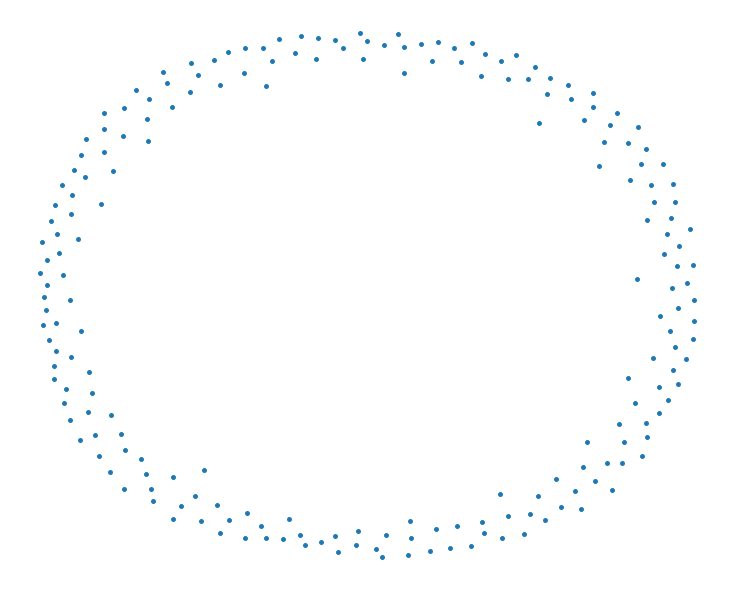

In [12]:
figure(figsize=(10, 8))
nx.draw(G, node_size=15)

## Connect Nodes with edges

In [13]:
for entities in articles:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

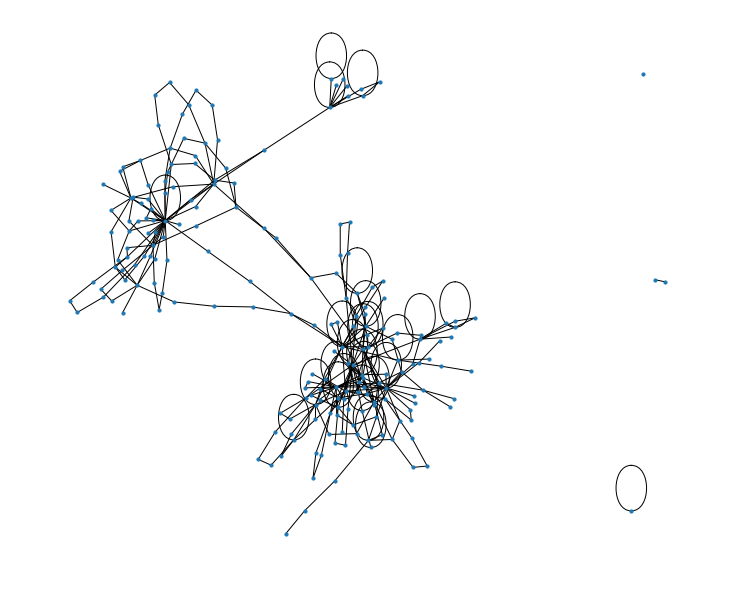

In [14]:
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

We can tell that some nodes are heavier on connections than others.

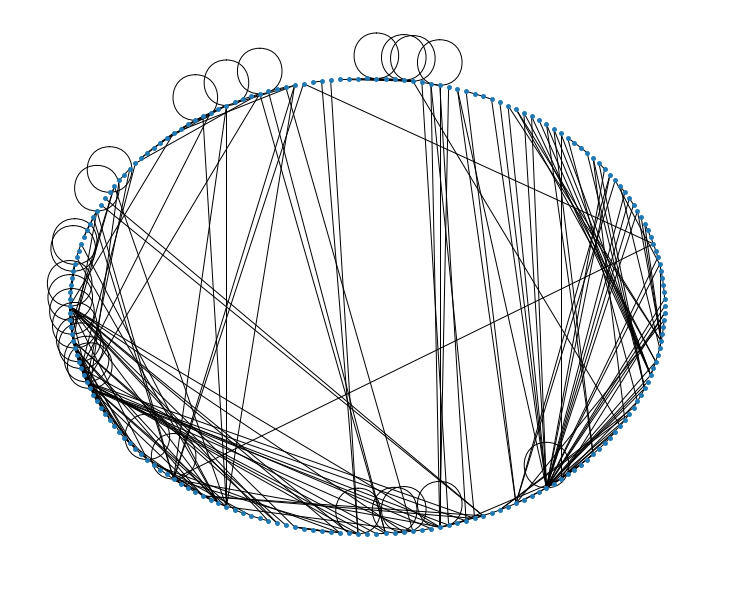

In [15]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)

To see which nodes have the most connections, let’s use G.degree().

In [16]:
G.degree()

DegreeView({'U.S.': 18, 'North Carolina Reports': 1, 'North Carolina': 5, 'Los Angeles': 7, 'Chicago': 11, 'Washington': 9, 'D.C.': 16, 'NC': 0, 'LA': 6, 'Illinois': 9, 'Seattle': 2, 'California': 19, 'New York': 12, 'Virginia': 2, 'Maryland': 3, 'Prince George County': 2, 'Md.': 2, 'OG County': 1, 'LA County': 1, 'Northern Virginia': 2, 'West Palm Beach': 3, 'Florida': 5, 'Bedminster': 3, 'N.J.': 3, 'Miami': 6, 'Wuhan': 2, 'Hubei Province': 2, 'People Republic of China': 2, 'United States': 15, 'Islamic Republic of Iran': 2, 'Schengen Area of Europe': 2, 'United States of America': 1, 'New Jersey': 6, 'West Wing': 2, 'Massachusetts': 5, 'Texas': 8, 'Kennebunkport': 2, 'Maine': 1, 'Biarritz': 2, 'France': 2, 'G7': 2, 'R-Alaska': 2, 'Ireland': 1, 'Italy': 4, 'Japan': 2, 'Canada': 2, 'France Germany': 2, 'Britain': 2, 'China': 3, 'United States Golf Association': 1, 'Minnesota': 6, 'Chino Hills': 1, 'Davenport': 2, 'Iowa': 4, 'Hollywood': 3, 'America': 4, 'Zoom': 4, 'Brooklyn': 2, 'Crazy

In [17]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('Nassau County', 30)

To find out which other nodes have the most number of connections, let’s check the top 5:

In [18]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [19]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Nassau County', 30)
('California', 19)
('U.S.', 18)
('D.C.', 16)
('United States', 15)


Gephi is an open-source and free desktop application that lets us visualize, explore, and analyze all kinds of graphs and networks.

Let’s export our graph data into a file so we can import it into Gephi.

In [20]:
# nx.write_gexf(G, "npr_coronavirus_GPE_50.gexf")